In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
import copy
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import SelectKBest, f_classif



In [38]:
#прочитать и сформировать MultiHeader
file = pd.ExcelFile('Dataset_all_1.xlsx')
df = pd.read_excel(file, header = 0, index_col=0)

In [39]:
#удалить столбцы с >20% нулевых значений
df_clean = df.dropna(axis = 1, thresh=int(0.8*len(df)))

In [40]:
#заполнить оставшиеся пропущенные значения средним по столбцам
df_fill_mean = df_clean.fillna(df_clean.mean())

In [41]:
features = df_fill_mean.columns.values.tolist()[2:]
features


['возраст',
 'одышка',
 'одышка при физнагрузке',
 'невозможность вдохнуть полной грудью',
 'скованность в гр клетке',
 'нехватка воздуха',
 'нарушение ночного сна',
 'удушье',
 'заложенность носа',
 'кашель',
 'мокрота',
 'свисты в гр клетке',
 'Хрипы при дыхании',
 'учащенное дыхание',
 'учащенное сердцебиение',
 'повышение АД',
 'повышение температуры',
 'отеки конечностей',
 'головокружение',
 'головная боль',
 'боль в области сердца',
 'боли в суставах',
 'снижение слуха',
 'утомляемость',
 'общая слабость',
 'ГБ',
 'ИБС',
 'туберкулез',
 'онкозаболевания',
 'сахарный диабет',
 'гепатит',
 'ВИЧ',
 'аллергия',
 'курение',
 'бронхиты',
 'периодическая одышка',
 'частое удушье',
 'хрипы',
 'Вредные условия труда',
 'общее состояние',
 'вспом мускулатура',
 'положение',
 'одышка.1',
 'кожные покровы',
 'цианоз губ',
 'грудная клетка',
 'перкуторно',
 'дыхание жесткое',
 'дыхание ослаблено',
 'свистящие хрипы',
 'влажные хрипы',
 'сухие хрипы',
 'крепитация',
 'выдох удлинен',
 'ЧДД в 

In [42]:
# Separating out the features
x = df_fill_mean.iloc[:,2:].values
#x = x[:,1:]
x

array([[79.,  1.,  1., ...,  0.,  0.,  3.],
       [76.,  1.,  1., ...,  2.,  3.,  3.],
       [72.,  1.,  0., ...,  0.,  1.,  1.],
       ...,
       [26.,  1.,  0., ...,  0.,  1.,  1.],
       [82.,  1.,  0., ...,  0.,  1.,  1.],
       [35.,  0.,  0., ...,  2.,  2.,  2.]])

In [43]:
# Separating out the target
y = df_fill_mean.loc[:,'Діагноз'].values
y

array(['ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ',
       'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ',
       'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ',
       'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ',
       'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ',
       'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'БА', 'БА', 'БА',
       'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА',
       'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА',
       'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА',
       'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА',
       'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'Пневмонія', 'Пневмонія',
       'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмонія',
       'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмонія',
       'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмон

In [44]:
x_stan = StandardScaler().fit_transform(x)
print(x_stan[:2,:])


[[ 1.61826478  0.88531564  0.85839508 -0.39735971  1.54421999  2.9032002
  -0.21821789 -0.68313005 -0.34444748  0.45935735  1.11233454  1.69774938
  -0.98496155  8.06225775  2.06881609 -0.39735971 -0.79349205 -0.21821789
  -0.43495884 -0.51887452 -0.51887452 -0.31622777 -0.19841895 -0.49526056
   0.60068689  1.26025208 -0.55401326 -0.21821789 -0.12403473 -0.21821789
  -0.08737041 -0.08737041 -0.41005072  2.6925824   1.28062485  1.63299316
  -0.35805744  8.06225775 -0.41005072 -0.51887452 -0.4472136  -0.23664319
  -0.21821789 -1.39044357 -0.49526056  1.23675899  0.39553199 -0.92690611
   1.24034735 -0.43495884 -0.50709255  0.60068689 -0.15249857 -0.25400025
  -0.47399217  0.73135745 -0.42257713 -0.12403473  1.45488173  1.60708264
   0.24051913 -0.25400025 -0.15249857 -0.19841895 -0.30151134  0.09104969
   0.31843575  0.50747363  0.65691907 -0.46495248  0.62234291  0.94327065
  -1.70777768 -0.22613811 -0.40978488  4.94688553 -0.08531714  3.60959333
   2.12132034 -0.1767767   1.46385011  

In [45]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_stan)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
y_k = copy.copy(y)
y_k[y =='ХОЗЛ'] = 2
y_k[y =='БА'] = 0
y_k[y =='Пневмонія'] = 1

# make predictions
expected = list(y_k)
predicted = list(y_kmeans)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))



              precision    recall  f1-score   support

           0       0.89      0.30      0.45        53
           1       0.45      1.00      0.62        33
           2       0.90      0.78      0.84        46

    accuracy                           0.64       132
   macro avg       0.74      0.69      0.63       132
weighted avg       0.78      0.64      0.63       132

[[16 33  4]
 [ 0 33  0]
 [ 2  8 36]]


In [47]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(principalComponents)

[[-36.96232631   4.78231342]
 [-17.3784579   13.99137726]
 [-33.44696198  26.08145022]
 [ -8.63177187  -3.11172689]
 [-41.15780059  -6.50415746]
 [-13.43843449 -21.29336331]
 [ -4.96258038  19.50656933]
 [ -9.03809677   3.06055377]
 [  2.91915886  -0.09005814]
 [-19.88240703 -32.89469022]
 [-12.08994298 -12.71996585]
 [ -3.58190664 -25.03955035]
 [-19.78108454   9.56652198]
 [-12.16910417   4.00752199]
 [-22.97097768  12.16087198]
 [  3.69628548 -17.58936953]
 [-41.63599727  13.05953741]
 [ -9.01942129  -5.04400861]
 [-15.28328695   6.16066305]
 [ -3.72174247 -15.69475207]
 [-11.98656125 -12.27592945]
 [-11.48796212 -18.2273902 ]
 [  1.27375411 -11.8148378 ]
 [ 13.13877587   5.60134079]
 [ 22.46853737  21.0357217 ]
 [ -1.4806301  -17.87202009]
 [ -4.36063715  -6.30895768]
 [  7.55998708  -5.66445028]
 [  7.32140098  15.55212603]
 [ -5.82423279   0.91046535]
 [ -6.0963939   12.56083889]
 [ -6.86786987  -5.28855789]
 [  0.34156833 -30.45388877]
 [ 14.03579081 -24.66109617]
 [-22.96372066

In [48]:
principalDf = pd.DataFrame(data = principalComponents,
                            columns = ['principal component 1', 'principal component 2'])
principalDf
finalDf3 = pd.concat([principalDf, df_fill_mean[['Діагноз']].reset_index(drop=True)], axis = 1)
finalDf3

,principal component 1,principal component 2,Діагноз
0,-36.962326,4.782313,ХОЗЛ
1,-17.378458,13.991377,ХОЗЛ
2,-33.446962,26.081450,ХОЗЛ
3,-8.631772,-3.111727,ХОЗЛ
4,-41.157801,-6.504157,ХОЗЛ
...,...,...,...
127,-14.132983,47.647766,Пневмонія
128,-18.195633,15.358142,Пневмонія
129,30.438588,-9.488952,Пневмонія
130,-17.622930,13.764174,Пневмонія


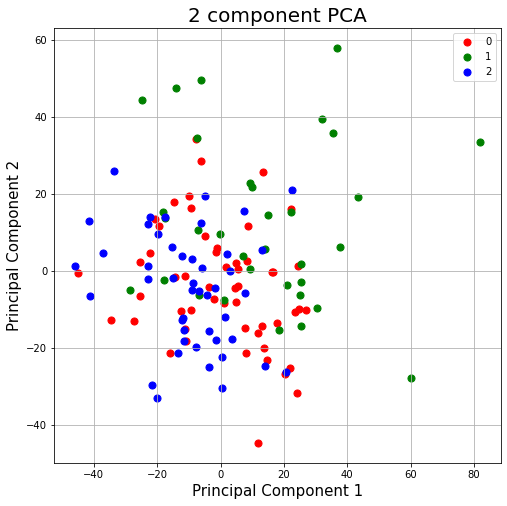

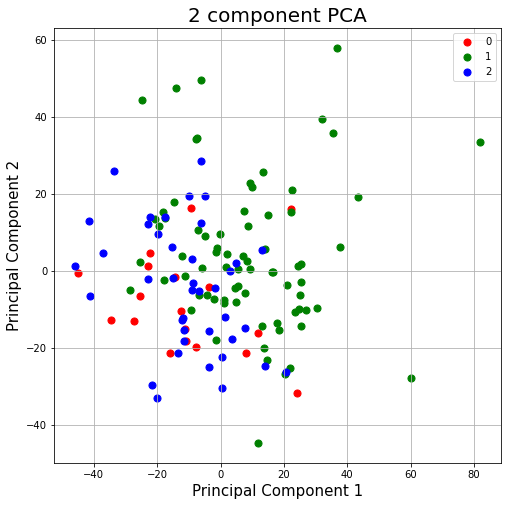

In [49]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_k == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_kmeans == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

NameError: name 'c1' is not defined

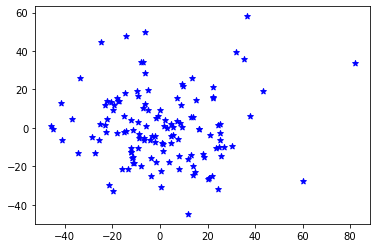

In [51]:
dbscan = DBSCAN(min_samples=20)

# Обучаем
dbscan.fit(x)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=3).fit(x)
pca_2d = pca.transform(x)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['БА', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

In [ ]:
dbscan.labels_

In [52]:
x_data_kbest = SelectKBest(f_classif, k=3).fit_transform(x_stan, y)
x_data_kbest

array([[-0.68313005,  0.60068689,  2.12132034],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.471

In [53]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_data_kbest)
y_kmeans


array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2])

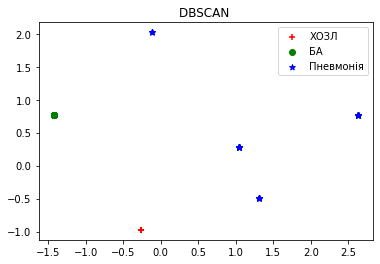

In [56]:
dbscan = DBSCAN(min_samples=20)

# Обучаем
dbscan.fit(x_data_kbest)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=3).fit(x_data_kbest)
pca_2d = pca.transform(x_data_kbest)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['ХОЗЛ', 'БА', 'Пневмонія'])
plt.title('DBSCAN ')
plt.show()

In [57]:
dbscan.labels_


array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  0, -1,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0, -1,  1,  1,  1,  1, -1, -1,  0, -1,  1,  1,
        0, -1,  1,  1, -1,  0,  0,  0, -1,  1,  1, -1,  0,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [58]:
y_k

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=object)

In [59]:
y_kmeans

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2])

In [60]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN

data = df_fill_mean
X = x_stan
y = y_k


algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))
algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative', 'DBSCAN'])

results

C:\Users\Ruslan\Anaconda3-2020.11-Windows-x86_64\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.184350,0.247062,0.206260,0.329369,0.253666,NaN
Affinity,0.149855,0.256618,0.554986,0.240716,0.335789,NaN
Spectral,0.105305,0.181596,0.151733,0.250075,0.188869,NaN
Agglomerative,0.178489,0.242385,0.203306,0.321189,0.249000,NaN
DBSCAN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
